# Simple Linear Regression

**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the CSV File**

In [2]:
data = pd.read_csv("Advertising.csv")

**Exploring the Data**

In [3]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data["Total Spend"] = data["TV"] + data["radio"] + data["newspaper"]
data

,TV,radio,newspaper,sales,Total Spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


**Plot the Data and Regression Line on the Total Spend vs Sales**

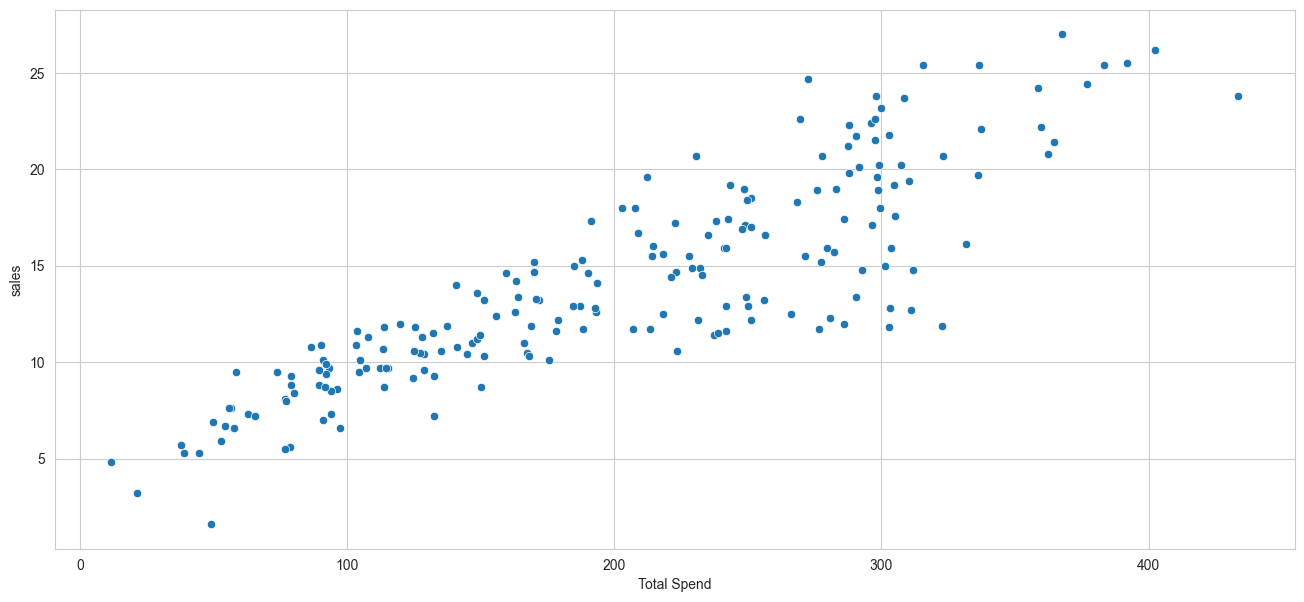

In [5]:
plt.figure(figsize=(16, 7))
sns.scatterplot(x="Total Spend", y="sales", data=data);

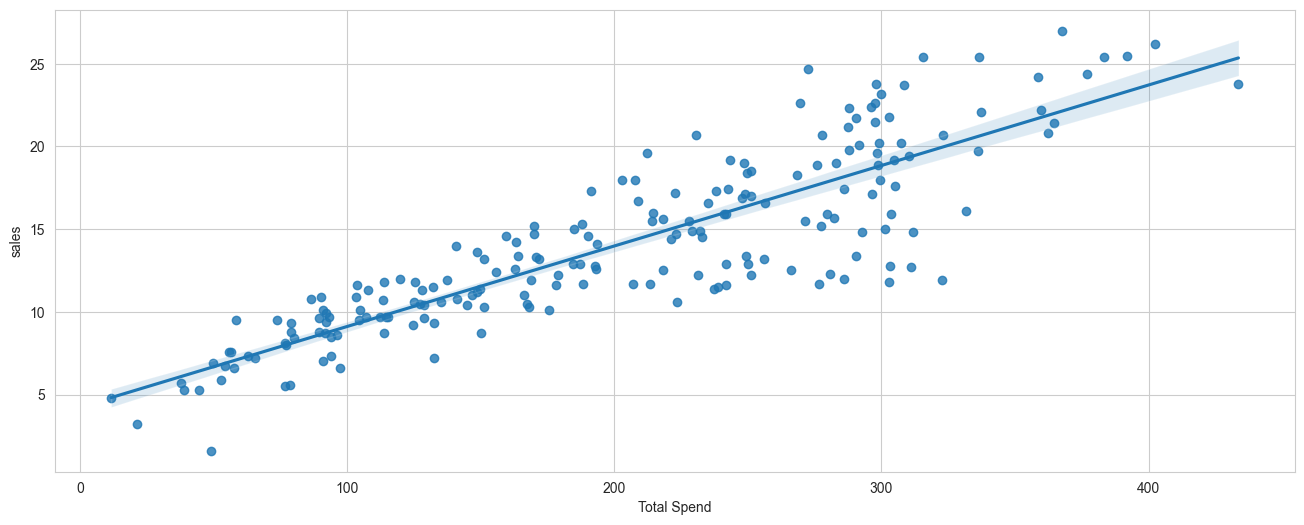

In [6]:
plt.figure(figsize=(16, 6))
sns.regplot(x="Total Spend", y="sales", data=data);

**Evaluating the Beta Values using the PolyFit using Degree 1 then Evaluate the Prediction**

In [7]:
x = data["Total Spend"]
y = data["sales"]

In [8]:
beta_values = np.polyfit(x, y, deg=1)

In [9]:
potential_spend = np.linspace(0, 500, 100)

In [10]:
predicted_sales = beta_values[0]*potential_spend + beta_values[1]

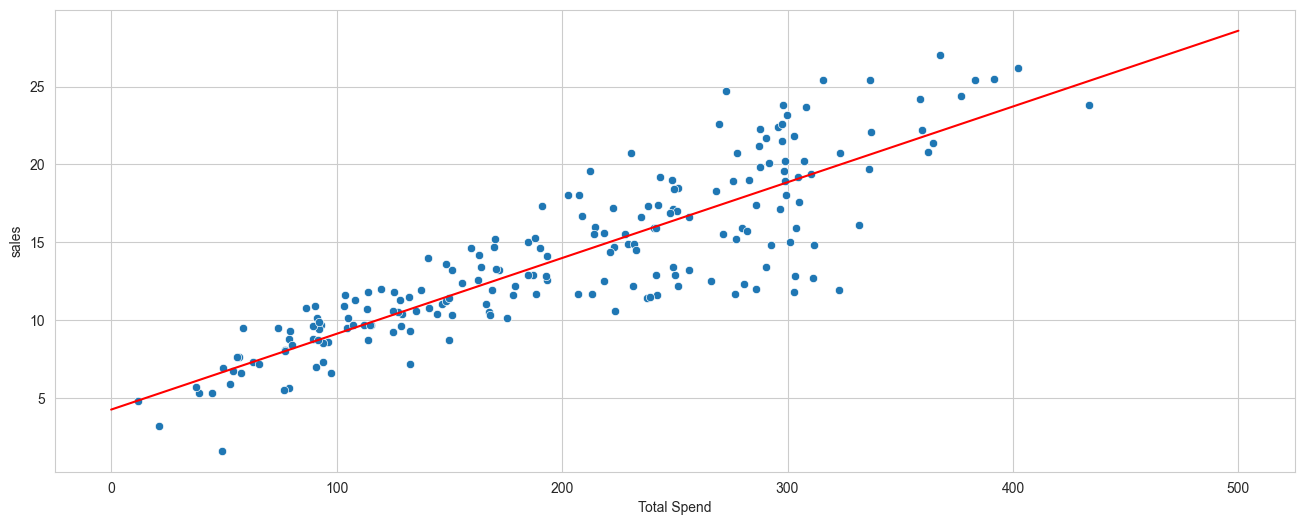

In [11]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="Total Spend", y="sales", data=data)
plt.plot(potential_spend, predicted_sales, color="red");

**Evaluating the Beta Values using the PolyFit using Degree 3 then Evaluate the Prediction**

In [12]:
beta_values = np.polyfit(x, y, deg=3)

In [13]:
predicted_sales = beta_values[0]*potential_spend**3 + beta_values[1]*potential_spend**2 + beta_values[2]*potential_spend + beta_values[3]

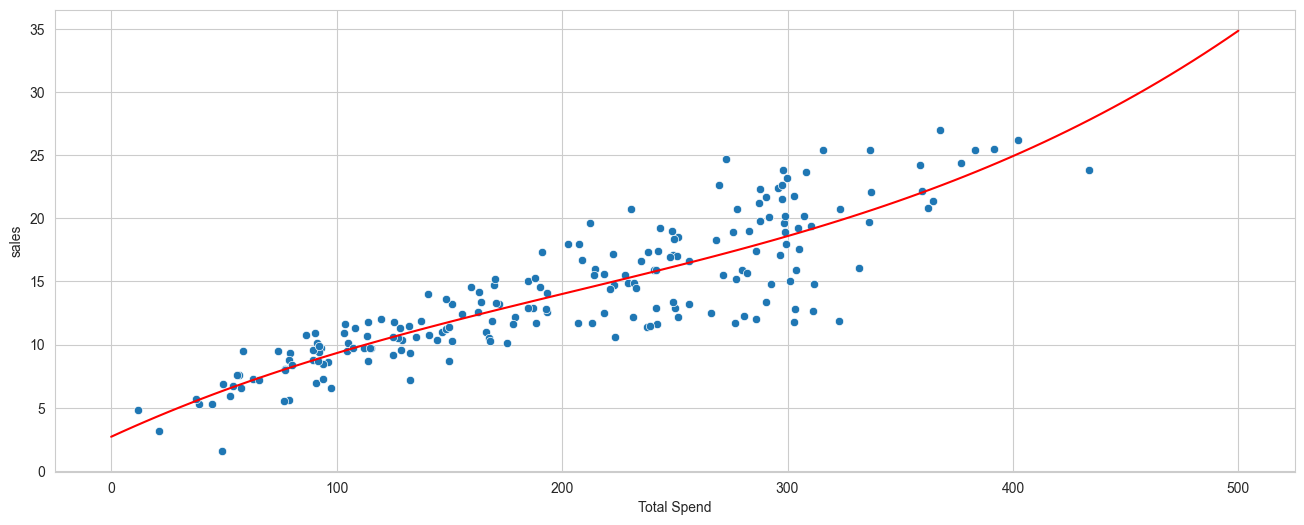

In [14]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="Total Spend", y="sales", data=data)
plt.plot(potential_spend, predicted_sales, color="red");

**Checking the Relationship b/w each features with sales**

In [15]:
data = data.drop(columns="Total Spend")

In [16]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


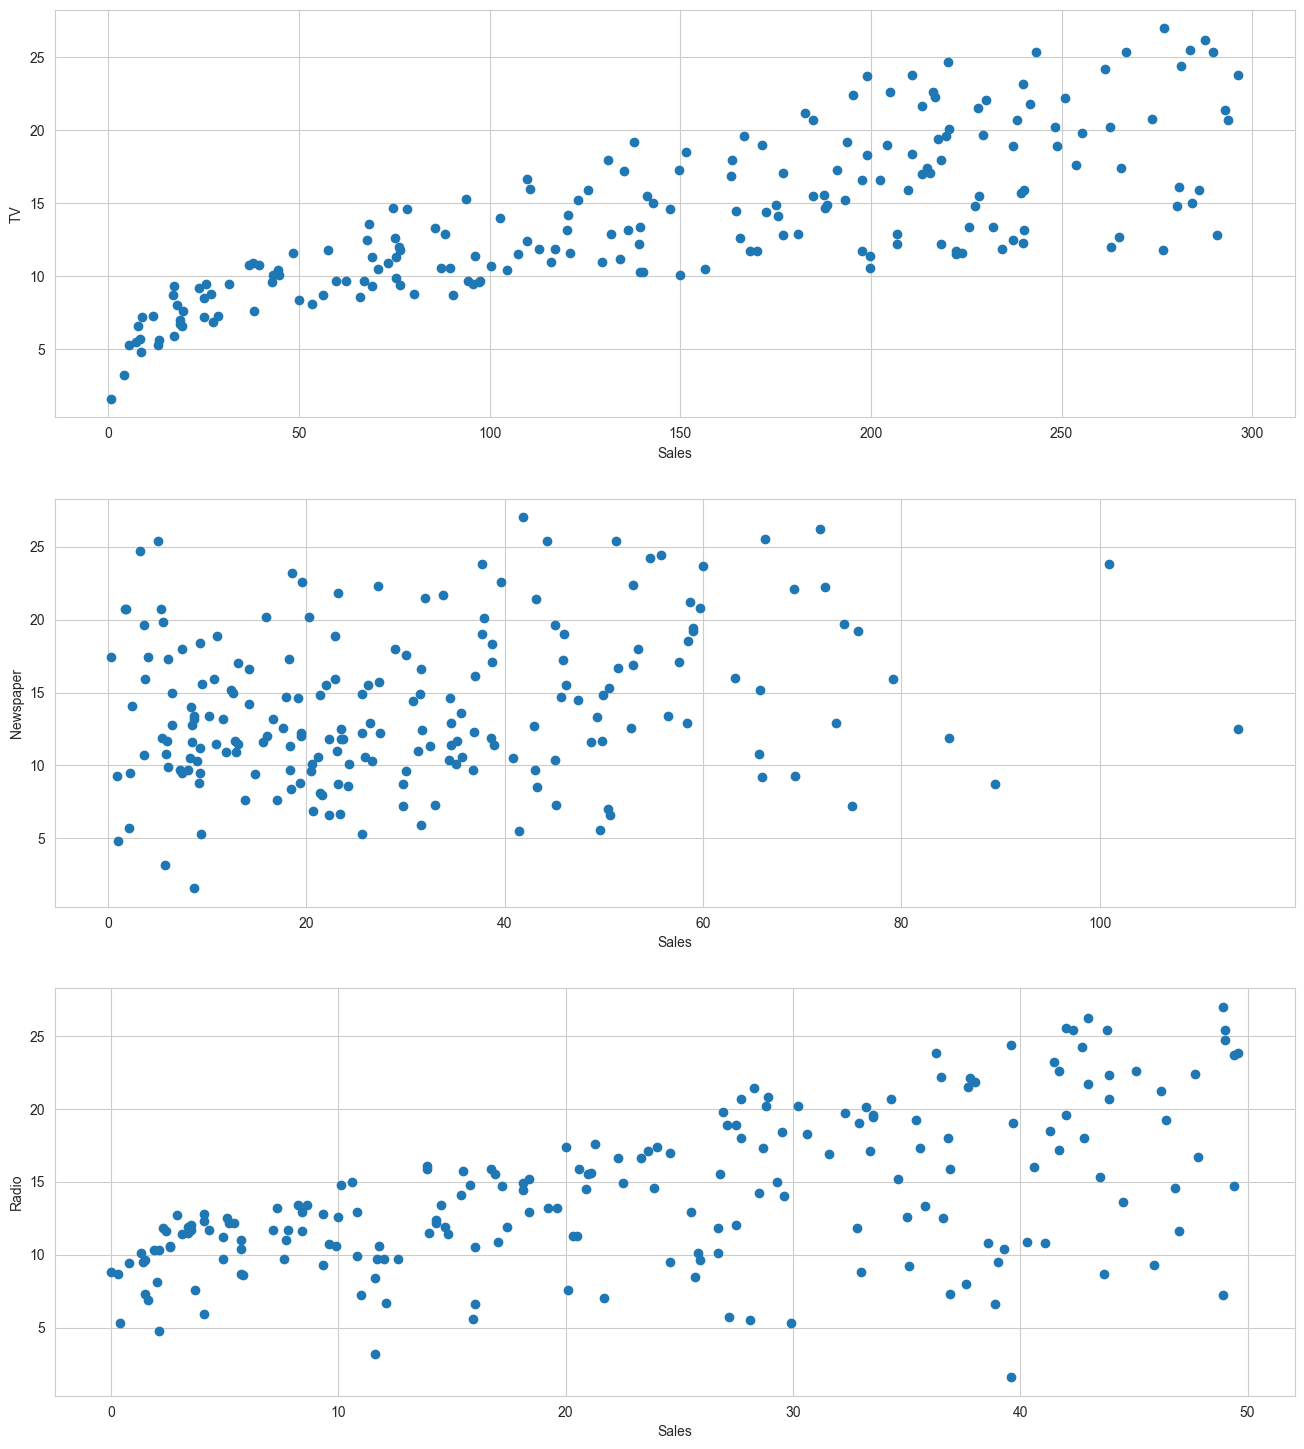

In [17]:
_, axis = plt.subplots(3, 1, figsize=(16, 18))

axis[0].plot(data["TV"], data["sales"], "o")
axis[0].set_xlabel("Sales")
axis[0].set_ylabel("TV")

axis[1].plot(data["newspaper"], data["sales"], "o")
axis[1].set_xlabel("Sales")
axis[1].set_ylabel("Newspaper")

axis[2].plot(data["radio"], data["sales"], "o")
axis[2].set_xlabel("Sales")
axis[2].set_ylabel("Radio")
plt.show()

**Splitting the Dependent and Independent Features**

In [18]:
x = data.drop(columns="sales")
y = data["sales"]

**Splitting the Data into the Training and Testing**

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

**Implementing the Linear Regression Model to train the data**

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)

**Evaluate the Performance Metrics**

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(data["sales"].mean())
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

14.0225
Mean Absolute Error: 1.340977429126211
Mean Squared Error: 4.535785391880795
Root Mean Squared Error: 2.1297383388296307


**Plotting the Residual Error**

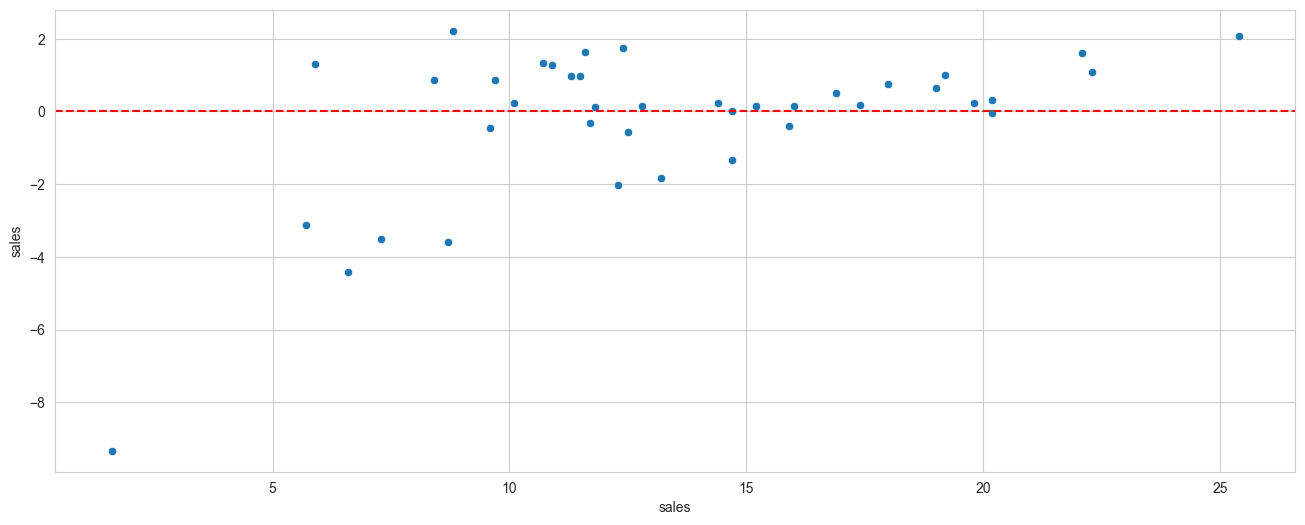

In [22]:
plt.figure(figsize=(16, 6))
residuals_test = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals_test)
plt.axhline(y=0, color="red", ls="--");

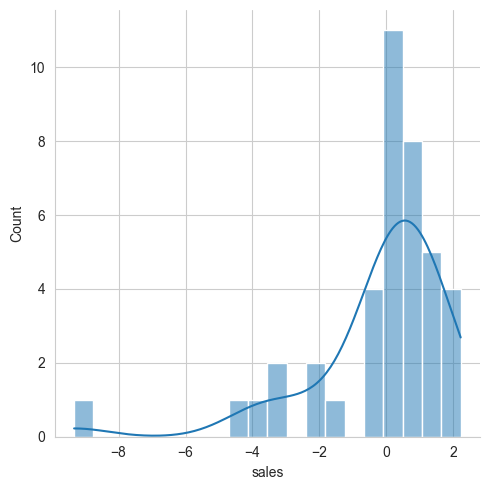

In [23]:
sns.displot(residuals_test, bins=20, kde=True);

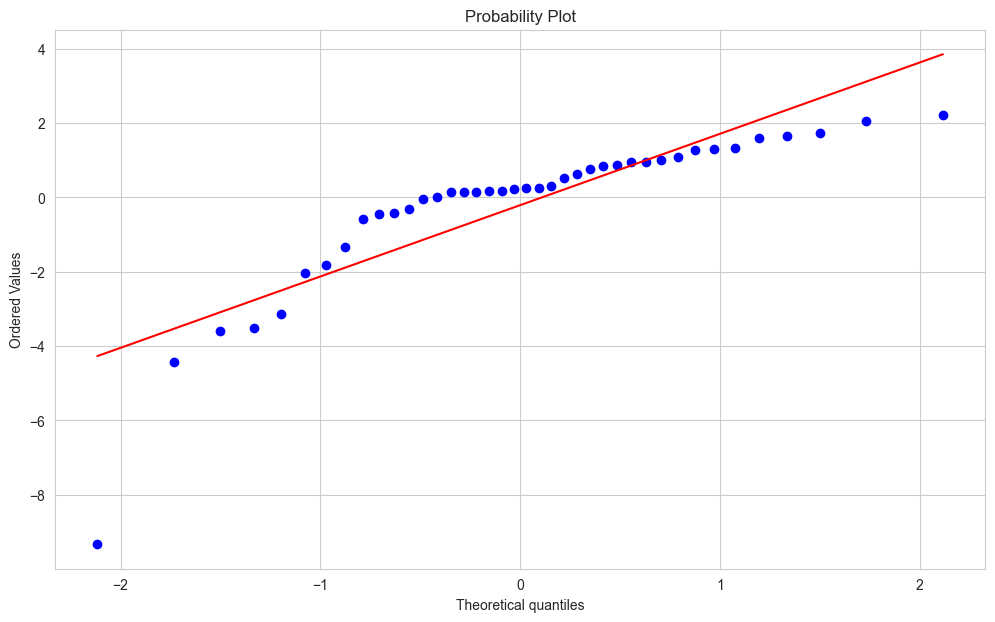

In [24]:
import scipy as sp
_, ax = plt.subplots(figsize=(12, 7))
sp.stats.probplot(residuals_test, plot=ax);

**Model Deployment and Interpret Coefficient**

In [25]:
final_model = LinearRegression()
final_model.fit(x, y)
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [26]:
from joblib import dump, load
dump(final_model, "Final Model.joblib")
final_model = load("Final Model.joblib")
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])